In [1]:
import pandas as pd
import chardet 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# How many unique companies are present in the companies file?
## In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.

#companies = pd.read_csv('companies.txt',encoding = 'ISO-8859-1',delimiter = '\t' )
companies_df = pd.read_csv('companies.txt',encoding = 'ISO-8859-1', delimiter = '\t')

In [3]:
companies_df.head(10)
#Check to ensure data set is and dont have any unwanted columns based on null count
companies_df.info()
#Since there are not a single column which require to drop considering more than 60% columns as null keeping companies data frame as it is
#Total number of unique records in companies data frame
unique_records_in_companies_df = companies_df.permalink.nunique()

#if any duplicate records exists in companies data frame
duplicate_records_in_company_df = unique_records_in_companies_df - companies_df.permalink.count()

print(duplicate_records_in_company_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58339 non-null object
founded_at       51144 non-null object
dtypes: object(10)
memory usage: 5.1+ MB
0


In [4]:
#reading round2 data file
rounds2_df = pd.read_csv('rounds2.csv',encoding = "ISO-8859-1")

In [5]:
rounds2_df.head(10)
#Check to ensure data set is and dont have any unwanted columns based on null count
rounds2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [6]:
rounds2_df.head(10)
#Check to ensure data set is and dont have any unwanted columns based on null count
rounds2_df.info()
#Since there are not a single column which require to drop considering more than 60% columns as null keeping companies data frame as it is
#Total number of unique records in companies data frame
unique_records_in_rounds2_df = rounds2_df.company_permalink.nunique()

#if any duplicate records exists in companies data frame
duplicate_records_in_rounds2_df = rounds2_df.company_permalink.count()  - unique_records_in_rounds2_df 

print(duplicate_records_in_rounds2_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB
24702


In [7]:
# As we can see funding_round_code has more than 60% rows which are null, we cna drop this columns
rounds2_df = rounds2_df.drop(columns = "funding_round_code")

In [8]:
#Reverify rounds2 data frame after dropping funding_round_code column
rounds2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 5 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(4)
memory usage: 4.4+ MB


In [9]:
# companies present in rounds file but not in (~) companies file
companies_df['permalink'] = [x.lower() for x in companies_df['permalink']]
rounds2_df['company_permalink'] = [x.lower() for x in rounds2_df['company_permalink']]
rounds2_df.loc[~rounds2_df['company_permalink'].isin(list(companies_df['permalink']))]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
729,/organization/51wofang-æ å¿§ææ¿,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,06-07-2015,5000000.0
3166,/organization/aesthetic-everythingâ®-social-ne...,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,12-10-2014,NaN
3291,/organization/affluent-attachã©-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,15-10-2014,100000.0
4568,/organization/allgã¤u-outlet,/funding-round/49e8a9b54ed19c8505ca92dc031a8e9c,venture,17-03-2015,1400000.0
8652,/organization/atã¶lye-gri,/funding-round/75bdeacd95a647108aa4bc480e77894d,grant,01-11-2012,13940.0
9784,/organization/axã¨gaz,/funding-round/511a41181aaf193bbd419babfb8d66e9,venture,06-07-2015,4094392.0
14311,/organization/borã©al-bikes-incorporated,/funding-round/be79575bf4b5b5d6fa64670800a3ca5e,seed,26-02-2015,NaN
14798,/organization/brasil-ozã´nio,/funding-round/4e0dd70413b121d23274187704e2d91b,seed,01-07-2015,799686.0
14951,/organization/bricoprivã©-com,/funding-round/c14e573c4cea05d355a20b5ba6b0d12d,undisclosed,24-06-2015,2809272.0
15384,/organization/bräv,/funding-round/978b27fe5c90372b11adbe33c75cdd03,seed,31-12-2014,1500.0


In [10]:
# Trying to find encoding applied on rounds2 dataframe
rawdata = open('rounds2.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

Windows-1254


In [11]:
#reading round2 data file with windows-1254 
#rounds2_df = pd.read_csv('c:/Users/aagarwala/upgrad/Invetsment Assignment/Data/rounds2.csv',
#                         encoding = "Windows-1254")

#windows -1254 throws error

In [12]:
# Trying to find encoding applied on companies dataframe
rawdata = open('companies.txt', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

utf-8


In [14]:
# Converting columns to be compared as lower
# remove encoding from companies df
companies_df['permalink'] = companies_df.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
companies_df['permalink'] = [x.lower() for x in companies_df['permalink']]

#force converting rounds2 column to utf 8 and than to lower
rounds2_df['company_permalink'] = rounds2_df.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2_df['company_permalink'] = [x.lower() for x in rounds2_df['company_permalink']]

In [15]:
#number of companies in round 2 which are not in companies
rounds2_df.loc[~rounds2_df['company_permalink'].isin(list(companies_df['permalink']))]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,06-07-2015,5000000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,15-10-2014,100000.0
4568,/organization/allgu-outlet,/funding-round/49e8a9b54ed19c8505ca92dc031a8e9c,venture,17-03-2015,1400000.0
8652,/organization/atlye-gri,/funding-round/75bdeacd95a647108aa4bc480e77894d,grant,01-11-2012,13940.0
9784,/organization/axgaz,/funding-round/511a41181aaf193bbd419babfb8d66e9,venture,06-07-2015,4094392.0
14311,/organization/boral-bikes-incorporated,/funding-round/be79575bf4b5b5d6fa64670800a3ca5e,seed,26-02-2015,NaN
14798,/organization/brasil-oznio,/funding-round/4e0dd70413b121d23274187704e2d91b,seed,01-07-2015,799686.0
14951,/organization/bricopriv-com,/funding-round/c14e573c4cea05d355a20b5ba6b0d12d,undisclosed,24-06-2015,2809272.0
15384,/organization/brv,/funding-round/978b27fe5c90372b11adbe33c75cdd03,seed,31-12-2014,1500.0


In [16]:
# Companies which are present in companies but not in rounds2
companies_df.loc[~companies_df['permalink'].isin(list(rounds2_df['company_permalink'])), :].count()

permalink        55
name             55
homepage_url     50
category_list    38
status           55
country_code     28
state_code       26
region           28
city             27
founded_at       27
dtype: int64

In [17]:
#Saving Clean csv files on to disk
rounds2_df.to_csv("rounds2_final.csv", sep=',', index=False)

# write companies file
companies_df.to_csv("companies_final.csv", sep='\t', index=False)

In [18]:
#loading clean files once again

rounds2_final_df = pd.read_csv('rounds2_final.csv', encoding = 'ISO-8859-1')
companies_final_df = pd.read_csv('companies_final.csv', sep = '\t', encoding = 'ISO-8859-1')

In [19]:
#unique values in each data frame
print(len(companies_final_df.permalink.unique()))
print(len(rounds2_final_df.company_permalink.unique()))

66368
66368


In [20]:
#Companies present in rounds2 but not in companies in data frame
companies_final_df['permalink'] = [x.lower() for x in companies_final_df['permalink']]
rounds2_final_df['company_permalink'] = [x.lower() for x in rounds2_final_df['company_permalink']]

rounds2_final_df.loc[~rounds2_final_df['company_permalink'].isin(companies_final_df['permalink']), :]


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,06-07-2015,5000000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,15-10-2014,100000.0
4568,/organization/allgu-outlet,/funding-round/49e8a9b54ed19c8505ca92dc031a8e9c,venture,17-03-2015,1400000.0
8652,/organization/atlye-gri,/funding-round/75bdeacd95a647108aa4bc480e77894d,grant,01-11-2012,13940.0
9784,/organization/axgaz,/funding-round/511a41181aaf193bbd419babfb8d66e9,venture,06-07-2015,4094392.0
14311,/organization/boral-bikes-incorporated,/funding-round/be79575bf4b5b5d6fa64670800a3ca5e,seed,26-02-2015,NaN
14798,/organization/brasil-oznio,/funding-round/4e0dd70413b121d23274187704e2d91b,seed,01-07-2015,799686.0
14951,/organization/bricopriv-com,/funding-round/c14e573c4cea05d355a20b5ba6b0d12d,undisclosed,24-06-2015,2809272.0
15384,/organization/brv,/funding-round/978b27fe5c90372b11adbe33c75cdd03,seed,31-12-2014,1500.0


In [21]:
#Companies present in companies but not in rounds2 in data frame
companies_final_df.loc[~companies_final_df['permalink'].isin(rounds2_final_df['company_permalink']), :].count()

permalink        55
name             55
homepage_url     50
category_list    38
status           55
country_code     28
state_code       26
region           28
city             27
founded_at       27
dtype: int64

In [22]:
#Testing on 1-2 set from above if above statement is correct
print(rounds2_final_df.loc[rounds2_final_df["company_permalink"] =="/organization/51wofang-"])


print(companies_final_df.loc[companies_final_df["permalink"] =="/organization/51wofang-"])

           company_permalink                          funding_round_permalink  \
729  /organization/51wofang-  /funding-round/346b9180d276a74e0fbb2825e66c6f5b   

    funding_round_type   funded_at  raised_amount_usd  
729            venture  06-07-2015          5000000.0  
Empty DataFrame
Columns: [permalink, name, homepage_url, category_list, status, country_code, state_code, region, city, founded_at]
Index: []


In [23]:
#Check for null values for permalink and company permalink
companies_final_df['permalink'].isnull().sum()
rounds2_final_df['company_permalink'].isnull().sum()

0

In [24]:
#As there are no missing values we are good to merge data frame
master_frame = pd.merge(companies_final_df, rounds2_final_df, how = "inner", left_on = "permalink", right_on = "company_permalink")
master_frame.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [25]:
master_frame.count()

permalink                  114888
name                       114887
homepage_url               108759
category_list              111497
status                     114888
country_code               106243
state_code                 103977
region                     104754
city                       104757
founded_at                  94392
company_permalink          114888
funding_round_permalink    114888
funding_round_type         114888
funded_at                  114888
raised_amount_usd           94924
dtype: int64

In [26]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114888 entries, 0 to 114887
Data columns (total 15 columns):
permalink                  114888 non-null object
name                       114887 non-null object
homepage_url               108759 non-null object
category_list              111497 non-null object
status                     114888 non-null object
country_code               106243 non-null object
state_code                 103977 non-null object
region                     104754 non-null object
city                       104757 non-null object
founded_at                 94392 non-null object
company_permalink          114888 non-null object
funding_round_permalink    114888 non-null object
funding_round_type         114888 non-null object
funded_at                  114888 non-null object
raised_amount_usd          94924 non-null float64
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


In [27]:
#finding diffrence between permalink and company-permalink columns
master_frame.loc[~master_frame['permalink'].isin(master_frame['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd


In [28]:
#As permalink and company company permalink consist same number of records and both represents same values 
# we can drop one of the column
master_frame = master_frame.drop(['company_permalink'], axis = 1)

In [29]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114888 entries, 0 to 114887
Data columns (total 14 columns):
permalink                  114888 non-null object
name                       114887 non-null object
homepage_url               108759 non-null object
category_list              111497 non-null object
status                     114888 non-null object
country_code               106243 non-null object
state_code                 103977 non-null object
region                     104754 non-null object
city                       104757 non-null object
founded_at                 94392 non-null object
funding_round_permalink    114888 non-null object
funding_round_type         114888 non-null object
funded_at                  114888 non-null object
raised_amount_usd          94924 non-null float64
dtypes: float64(1), object(13)
memory usage: 13.1+ MB


In [30]:
#finding column wise null values
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6129
category_list               3391
status                         0
country_code                8645
state_code                 10911
region                     10134
city                       10131
founded_at                 20496
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          19964
dtype: int64

In [31]:
#finding percentage of null columns
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.95
status                      0.00
country_code                7.52
state_code                  9.50
region                      8.82
city                        8.82
founded_at                 17.84
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.38
dtype: float64

In [32]:
#As funding_round_code has 73 % null values and we dont need columns like funding_round_permalink, founded_at, region, homepage_url
# We can  drop these columns
master_frame = master_frame.drop(['funding_round_permalink', 'homepage_url', 'founded_at', 'region'], axis=1)
master_frame.head()

,permalink,name,category_list,status,country_code,state_code,city,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,Delaware City,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,Delaware City,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,NaN,NaN,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,venture,19-03-2008,2000000.0


In [33]:
# we also can drop column funded_at, state_code and city as this is not require for our analysis
master_frame = master_frame.drop(['state_code','city', 'funded_at'], axis=1)
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,venture,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,seed,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,venture,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,venture,2000000.0


In [34]:
#As we have to work with raise_amount_usd, country_code, and permalink we need to treat this columns separately

#lets check for null in data frame
master_frame.isnull().sum()

permalink                 0
name                      1
category_list          3391
status                    0
country_code           8645
funding_round_type        0
raised_amount_usd     19964
dtype: int64

In [35]:
#category_list, country_code and raised_amount_usd consist of null values
# Will target raised_amount_usd first to handle null values as these is the most important column
pd.options.display.float_format = '{:.2f}'.format
master_frame['raised_amount_usd'].describe()

count         94924.00
mean       10429596.69
std       114842262.13
min               0.00
25%          323348.25
50%         1683437.50
75%         7000000.00
max     21271935000.00
Name: raised_amount_usd, dtype: float64

In [36]:
master_frame.loc[:,"raised_amount_usd"].median()

1683437.5

In [37]:
# As mean is 10 million USD  and median is 1.6 Million its a huge spread of amount and also we have 120 K observations 
# we can get rid of null values for raised_amount_usd
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink            0.00
name                 0.00
category_list        1.09
status               0.00
country_code         6.15
funding_round_type   0.00
raised_amount_usd    0.00
dtype: float64

In [38]:
#Explaing master_frame
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94924 entries, 0 to 114887
Data columns (total 7 columns):
permalink             94924 non-null object
name                  94923 non-null object
category_list         93885 non-null object
status                94924 non-null object
country_code          89087 non-null object
funding_round_type    94924 non-null object
raised_amount_usd     94924 non-null float64
dtypes: float64(1), object(6)
memory usage: 5.8+ MB


In [39]:
#total number of observatiobs 94924

In [40]:
#Converting country_code columns to category columns
country_codes = master_frame['country_code'].astype('category')

country_codes.value_counts()

USA    62047
GBR     5018
CAN     2616
CHN     1927
IND     1649
FRA     1448
ISR     1364
ESP     1074
DEU     1040
AUS      649
RUS      588
IRL      563
SWE      560
SGP      546
NLD      532
JPN      485
ITA      483
BRA      481
CHE      437
KOR      432
CHL      431
FIN      382
DNK      314
ARG      297
BEL      293
HKG      250
TUR      193
NOR      191
BGR      190
MEX      188
       ...  
KHM        2
DOM        2
MAR        2
MAF        2
KWT        2
NIC        2
ZMB        2
KAZ        2
TUN        2
SOM        1
SYC        1
SEN        1
TGO        1
QAT        1
UZB        1
PSE        1
PRY        1
OMN        1
DMA        1
BLM        1
MNE        1
MKD        1
BRB        1
LAO        1
IRN        1
HND        1
GRD        1
GGY        1
DZA        1
KNA        1
Name: country_code, Length: 134, dtype: int64

In [41]:
#percentage wise invetsments in country
100*(master_frame['country_code'].value_counts()/len(master_frame.index))

USA   65.36
GBR    5.29
CAN    2.76
CHN    2.03
IND    1.74
FRA    1.53
ISR    1.44
ESP    1.13
DEU    1.10
AUS    0.68
RUS    0.62
IRL    0.59
SWE    0.59
SGP    0.58
NLD    0.56
JPN    0.51
ITA    0.51
BRA    0.51
CHE    0.46
KOR    0.46
CHL    0.45
FIN    0.40
DNK    0.33
ARG    0.31
BEL    0.31
HKG    0.26
TUR    0.20
NOR    0.20
BGR    0.20
MEX    0.20
       ... 
KWT    0.00
ZMB    0.00
MAF    0.00
KHM    0.00
BLZ    0.00
TUN    0.00
ALB    0.00
BAH    0.00
MAR    0.00
MNE    0.00
IRN    0.00
PSE    0.00
SEN    0.00
KNA    0.00
GRD    0.00
BRB    0.00
OMN    0.00
DMA    0.00
TGO    0.00
SOM    0.00
PRY    0.00
MKD    0.00
GGY    0.00
DZA    0.00
SYC    0.00
BLM    0.00
QAT    0.00
UZB    0.00
LAO    0.00
HND    0.00
Name: country_code, Length: 134, dtype: float64

In [42]:
# As we see most of the invetsments on top 8 countries we can get rid of null for country column
master_frame = master_frame[~pd.isnull(master_frame['country_code'])]

master_frame.isnull().sum()

permalink               0
name                    1
category_list         578
status                  0
country_code            0
funding_round_type      0
raised_amount_usd       0
dtype: int64

In [43]:
#removing Null for category_list as it consist of few null values compare to overall set
master_frame = master_frame[~pd.isnull(master_frame['category_list'])]
master_frame.isnull().sum()

permalink             0
name                  1
category_list         0
status                0
country_code          0
funding_round_type    0
raised_amount_usd     0
dtype: int64

In [44]:
#findind record with null in company name
master_frame[pd.isnull(master_frame['name'])]

,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
98641,/organization/tell-it-in,NaN,Startups,closed,USA,seed,25000.00


In [45]:
# As this is small amount and we dont have much to do with name column we can keep this columns as it is

In [46]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88509 entries, 0 to 114887
Data columns (total 7 columns):
permalink             88509 non-null object
name                  88508 non-null object
category_list         88509 non-null object
status                88509 non-null object
country_code          88509 non-null object
funding_round_type    88509 non-null object
raised_amount_usd     88509 non-null float64
dtypes: float64(1), object(6)
memory usage: 5.4+ MB


In [47]:
#Save Final Data frame into disk

master_frame.to_csv("c:/Users/aagarwala/upgrad/Invetsment Assignment/Data/master_frame_final.csv", sep=',', index=False)

In [48]:
#read master frame file from disk
master_frame = pd.read_csv("c:/Users/aagarwala/upgrad/Invetsment Assignment/Data/master_frame_final.csv")

In [49]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88509 entries, 0 to 88508
Data columns (total 7 columns):
permalink             88509 non-null object
name                  88508 non-null object
category_list         88509 non-null object
status                88509 non-null object
country_code          88509 non-null object
funding_round_type    88509 non-null object
raised_amount_usd     88509 non-null float64
dtypes: float64(1), object(6)
memory usage: 4.7+ MB


In [50]:
# first, let's filter the df so it only contains the four specified funding types
master_frame = master_frame[(master_frame.funding_round_type == "venture") | 
        (master_frame.funding_round_type == "angel") | 
        (master_frame.funding_round_type == "seed") | 
        (master_frame.funding_round_type == "private_equity") ]

master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75113 entries, 0 to 88508
Data columns (total 7 columns):
permalink             75113 non-null object
name                  75112 non-null object
category_list         75113 non-null object
status                75113 non-null object
country_code          75113 non-null object
funding_round_type    75113 non-null object
raised_amount_usd     75113 non-null float64
dtypes: float64(1), object(6)
memory usage: 4.6+ MB


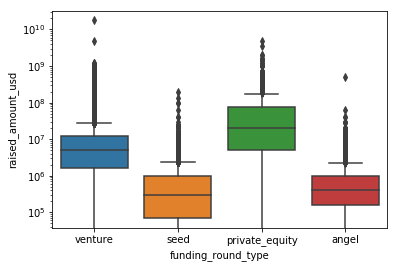

In [51]:
# comparing summary stats across four categories
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')

plt.show()

In [52]:
# comparing the mean and median values across categories
master_frame.pivot_table(values='raised_amount_usd', columns='funding_round_type', aggfunc=[np.median, np.mean])

median                                          mean  \
funding_round_type     angel private_equity      seed    venture     angel   
raised_amount_usd  414906.00    20000000.00 300000.00 5000000.00 971573.89   

                                                         
funding_round_type private_equity      seed     venture  
raised_amount_usd     73938486.28 747868.44 11724937.64

In [53]:
#Will consider Median as difference between mean and median is high
#private equity median is 20 M which is beyond limit of investment 5-15 million
#However venture median is 5 M which is right suit for investment so we will go with venture as funding type

In [54]:
#Filter data for venture type funding
master_frame  = master_frame.loc[master_frame["funding_round_type"] == "venture" ]

In [55]:
#countrywise total for veture type funding

country_wise_funding= master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

print (country_wise_funding)

country_code
USA   420068029342.00
CHN    39338918773.00
GBR    20072813004.00
IND    14261508718.00
CAN     9482217668.00
FRA     7208456960.00
ISR     6854350477.00
DEU     6305521981.00
JPN     3167647127.00
SWE     3145856571.00
NLD     2903875785.00
CHE     2801560264.00
SGP     2793917856.00
ESP     1827622434.00
BRA     1785817890.00
IRL     1669285543.00
RUS     1570426005.00
AUS     1319028698.00
DNK     1228310641.00
FIN     1043199709.00
BEL     1030839980.00
NOR      953636117.00
KOR      891988262.00
MYS      883058787.00
HKG      781266982.00
TWN      623979485.00
AUT      583360681.00
TUR      559048277.00
ITA      488289353.00
NZL      448316383.00
            ...      
KWT       14000000.00
LIE       13091716.00
MNE       12200000.00
SVN       12017508.00
BGR       11300000.00
KAZ       11000000.00
GRC       10743775.00
BAH        8900000.00
TTO        8500000.00
SVK        8241062.00
BGD        7002000.00
LBN        6455000.00
GGY        3960000.00
TUN        3920000.

In [56]:
# top 9 countries for funding
top9  =  country_wise_funding[:9]

print(top9)

country_code
USA   420068029342.00
CHN    39338918773.00
GBR    20072813004.00
IND    14261508718.00
CAN     9482217668.00
FRA     7208456960.00
ISR     6854350477.00
DEU     6305521981.00
JPN     3167647127.00
Name: raised_amount_usd, dtype: float64


In [57]:
top9.describe()

count              9.00
mean     58528829338.89
std     136023455470.08
min       3167647127.00
25%       6854350477.00
50%       9482217668.00
75%      20072813004.00
max     420068029342.00
Name: raised_amount_usd, dtype: float64

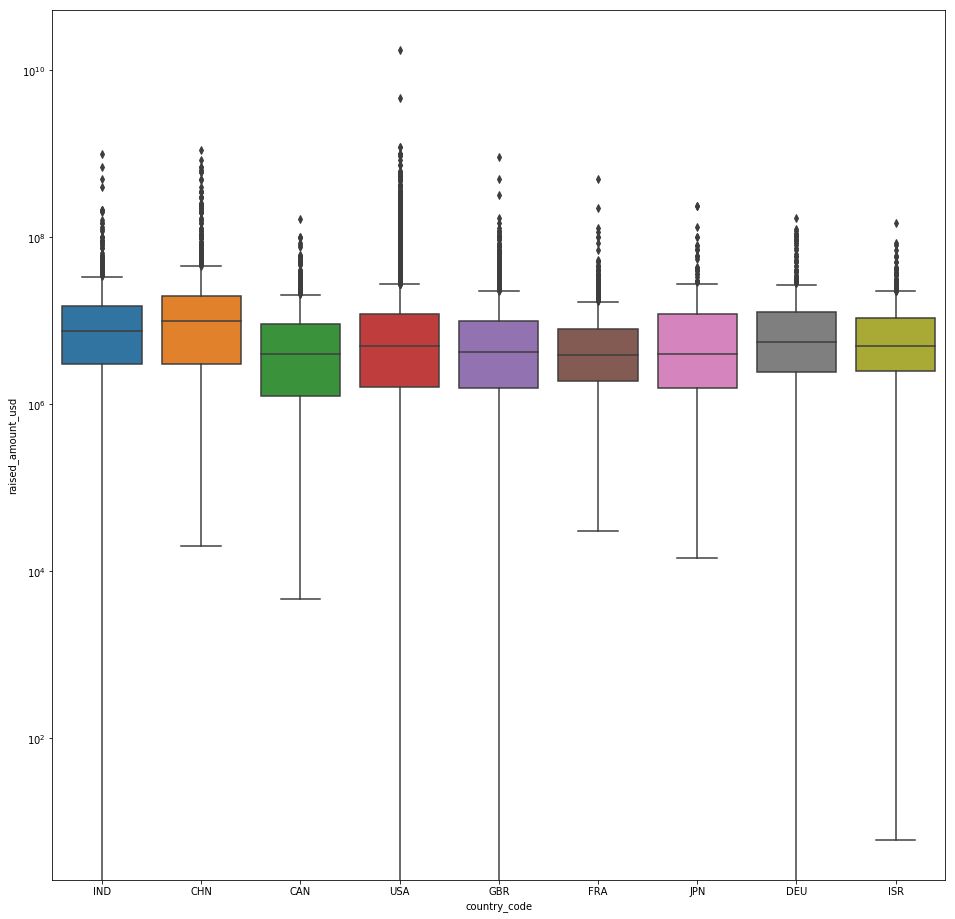

In [58]:
# boxplot to see distributions of funding amount across countries
master_frame = master_frame[master_frame["country_code"].isin(["USA", "CHN", "GBR","IND","CAN", "FRA", "ISR", "DEU", "JPN"])]

plt.figure(figsize=(16, 16))
sns.boxplot(x='country_code', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

In [59]:
# filtering for the top three countries
master_frame = master_frame[(master_frame.country_code =='USA') | (master_frame.country_code=='GBR') | (master_frame.country_code=='IND')]
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,venture,10000000.00
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,20000000.00
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,1700000.00
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,8900000.00
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,venture,5000000.00


In [60]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 88498
Data columns (total 7 columns):
permalink             38803 non-null object
name                  38803 non-null object
category_list         38803 non-null object
status                38803 non-null object
country_code          38803 non-null object
funding_round_type    38803 non-null object
raised_amount_usd     38803 non-null float64
dtypes: float64(1), object(6)
memory usage: 2.4+ MB


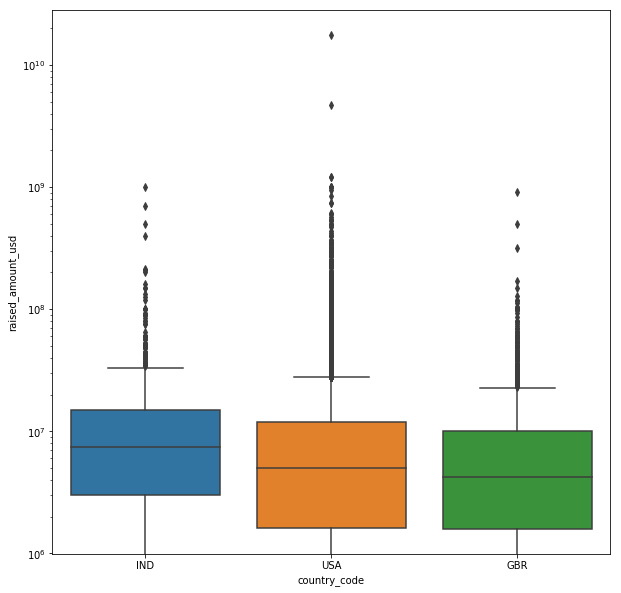

In [61]:
# boxplot to see distributions of funding amount across countries
plt.figure(figsize=(10, 10))
sns.boxplot(x='country_code', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()


In [62]:
master_frame["primary_sector"]  = (master_frame["category_list"].str.split('|').str[0])

In [63]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 88498
Data columns (total 8 columns):
permalink             38803 non-null object
name                  38803 non-null object
category_list         38803 non-null object
status                38803 non-null object
country_code          38803 non-null object
funding_round_type    38803 non-null object
raised_amount_usd     38803 non-null float64
primary_sector        38803 non-null object
dtypes: float64(1), object(7)
memory usage: 3.9+ MB


In [64]:
master_frame.drop('category_list', axis=1)
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,operating,IND,venture,10000000.00,Media
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,20000000.00,Analytics
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,1700000.00,Analytics
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,8900000.00,Analytics
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,venture,5000000.00,Apps


In [65]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 88498
Data columns (total 8 columns):
permalink             38803 non-null object
name                  38803 non-null object
category_list         38803 non-null object
status                38803 non-null object
country_code          38803 non-null object
funding_round_type    38803 non-null object
raised_amount_usd     38803 non-null float64
primary_sector        38803 non-null object
dtypes: float64(1), object(7)
memory usage: 3.9+ MB


In [66]:
#read mapping file and drop null

mapping_df = pd.read_csv("c:/Users/aagarwala/upgrad/Invetsment Assignment/Data/mapping.csv" ).dropna() 

In [67]:
mapping_df.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [68]:
mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        687 non-null int64
Blanks                                     687 non-null int64
Cleantech / Semiconductors                 687 non-null int64
Entertainment                              687 non-null int64
Health                                     687 non-null int64
Manufacturing                              687 non-null int64
News, Search and Messaging                 687 non-null int64
Others                                     687 non-null int64
Social, Finance, Analytics, Advertising    687 non-null int64
dtypes: int64(9), object(1)
memory usage: 59.0+ KB


In [69]:
#Converting category list to lower case

mapping_df['category_list'] = mapping_df['category_list'].str.lower()

In [70]:
#converting primary sector to lower case
master_frame["primary_sector"] = master_frame["primary_sector"].str.lower()

In [71]:
#category_list which are not in mapping file

master_frame[~master_frame["primary_sector"].isin(mapping_df['category_list'])]

,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,primary_sector
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,20000000.00,analytics
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,1700000.00,analytics
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,8900000.00,analytics
47,/organization/100plus,100Plus,Analytics,acquired,USA,venture,500000.00,analytics
136,/organization/1world-online,1World Online,Analytics|Big Data|Enterprise Software|Market ...,operating,USA,venture,2500000.00,analytics
137,/organization/1world-online,1World Online,Analytics|Big Data|Enterprise Software|Market ...,operating,USA,venture,500000.00,analytics
138,/organization/1world-online,1World Online,Analytics|Big Data|Enterprise Software|Market ...,operating,USA,venture,1000000.00,analytics
187,/organization/24-7-card,24/7 Card,Finance,closed,USA,venture,3452941.00,finance
590,/organization/6th-wave-innovations-corporation,6th Wave Innovations Corporation,Nanotechnology,operating,USA,venture,2569720.00,nanotechnology
597,/organization/7-billion-people,7 Billion People,Analytics|E-Commerce|Software,closed,USA,venture,2368902.00,analytics


In [72]:
#category_list which are not in mapping file

mapping_df[~mapping_df["category_list"].isin(master_frame['primary_sector'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
64,biomass power generation,0,0,1,0,0,0,0,0,0
69,boating industry,1,0,0,0,0,0,0,0,0
77,building owners,0,0,0,0,0,0,1,0,0
79,business a0lytics,0,0,0,0,0,0,0,0,1


In [73]:
#Category list contains 0 in name which seems replced na by 0 we can revert it back
mapping_df['category_list'] = mapping_df['category_list'].apply(lambda x: x.replace('0', 'na'))

In [74]:
#category_list which are not in mapping file

master_frame[~master_frame["primary_sector"].isin(mapping_df['category_list'])]

,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,primary_sector
15898,/organization/clean-vehicle-solutions,Clean Vehicle Solutions,Natural Gas Uses|Service Providers|Services,operating,USA,venture,125000.00,natural gas uses
17988,/organization/consensus-point,Consensus Point,Enterprise 2.0|Enterprise Software|Market Rese...,operating,USA,venture,788374.00,enterprise 2.0
17990,/organization/consensus-point,Consensus Point,Enterprise 2.0|Enterprise Software|Market Rese...,operating,USA,venture,2600000.00,enterprise 2.0
22348,/organization/dolores-speech-products,Dolores Speech Products,Adaptive Equipment|Innovation Management|Speec...,operating,USA,venture,250000.00,adaptive equipment
27525,/organization/fia-formula-e,FIA Formula E,Racing,closed,GBR,venture,68569234.00,racing
28069,/organization/five-below,Five Below,Specialty Retail,ipo,USA,venture,194000000.00,specialty retail
28274,/organization/flexport,Flexport,Enterprise 2.0|Enterprise Software|Insurance|L...,operating,USA,venture,20000000.00,enterprise 2.0
33660,/organization/healthtell,HealthTell,Biotechnology and Semiconductor|Diagnostics|He...,operating,USA,venture,9486929.00,biotechnology and semiconductor
40069,/organization/justinmind,Justinmind,Rapidly Expanding|Software|Usability|User Expe...,operating,USA,venture,862000.00,rapidly expanding
54096,/organization/omega-point-research,Omega Point Research,Product Search,closed,USA,venture,3172815.00,product search


In [75]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 88498
Data columns (total 8 columns):
permalink             38803 non-null object
name                  38803 non-null object
category_list         38803 non-null object
status                38803 non-null object
country_code          38803 non-null object
funding_round_type    38803 non-null object
raised_amount_usd     38803 non-null float64
primary_sector        38803 non-null object
dtypes: float64(1), object(7)
memory usage: 3.9+ MB


In [76]:
#merging mapping and master data frame

# merge the dfs
master_frame = pd.merge(master_frame, mapping_df, how='inner', left_on='primary_sector', right_on='category_list')
master_frame.head()


,permalink,name,category_list_x,status,country_code,funding_round_type,raised_amount_usd,primary_sector,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,Media,operating,IND,venture,10000000.00,media,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,venture,15000000.00,media,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,venture,5800000.00,media,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,venture,18000000.00,media,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,venture,5000000.00,media,media,0,0,0,1,0,0,0,0,0


In [77]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 18 columns):
permalink                                  38788 non-null object
name                                       38788 non-null object
category_list_x                            38788 non-null object
status                                     38788 non-null object
country_code                               38788 non-null object
funding_round_type                         38788 non-null object
raised_amount_usd                          38788 non-null float64
primary_sector                             38788 non-null object
category_list_y                            38788 non-null object
Automotive & Sports                        38788 non-null int64
Blanks                                     38788 non-null int64
Cleantech / Semiconductors                 38788 non-null int64
Entertainment                              38788 non-null int64
Health                                     38788 

In [78]:
 master_frame.drop('category_list_x', axis=1)

,permalink,name,status,country_code,funding_round_type,raised_amount_usd,primary_sector,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,venture,10000000.00,media,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,venture,15000000.00,media,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,venture,5800000.00,media,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,venture,18000000.00,media,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,venture,5000000.00,media,media,0,0,0,1,0,0,0,0,0
5,/organization/audiosocket,Audiosocket,operating,USA,venture,650000.00,media,media,0,0,0,1,0,0,0,0,0
6,/organization/audiosocket,Audiosocket,operating,USA,venture,750000.00,media,media,0,0,0,1,0,0,0,0,0
7,/organization/audiosocket,Audiosocket,operating,USA,venture,1582300.00,media,media,0,0,0,1,0,0,0,0,0
8,/organization/babble,Babble,acquired,USA,venture,2000000.00,media,media,0,0,0,1,0,0,0,0,0
9,/organization/babble,Babble,acquired,USA,venture,1250000.00,media,media,0,0,0,1,0,0,0,0,0


In [79]:
#master_frame = master_frame.drop(columns='category_list_x')
master_frame = master_frame.drop(columns='category_list_y')

In [80]:
###top9 Table
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 17 columns):
permalink                                  38788 non-null object
name                                       38788 non-null object
category_list_x                            38788 non-null object
status                                     38788 non-null object
country_code                               38788 non-null object
funding_round_type                         38788 non-null object
raised_amount_usd                          38788 non-null float64
primary_sector                             38788 non-null object
Automotive & Sports                        38788 non-null int64
Blanks                                     38788 non-null int64
Cleantech / Semiconductors                 38788 non-null int64
Entertainment                              38788 non-null int64
Health                                     38788 non-null int64
Manufacturing                              38788 n

###### Creating series for values
value_series = master_frame.columns[7:16]

print(value_series)

In [81]:
value_series = master_frame.columns[7:17]

print(value_series)

Index(['primary_sector', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')


In [82]:
#finding remaining vectors

remaining_vectors = np.setdiff1d(master_frame.columns, value_series)
print(remaining_vectors)

['category_list_x' 'country_code' 'funding_round_type' 'name' 'permalink'
 'raised_amount_usd' 'status']


In [83]:
#Convert into long data frame

master_frame_long_df = pd.melt(master_frame, 
        id_vars=list(remaining_vectors), 
        value_vars=list(value_series))

master_frame_long_df.head()

,category_list_x,country_code,funding_round_type,name,permalink,raised_amount_usd,status,variable,value
0,Media,IND,venture,#fame,/organization/-fame,10000000.00,operating,primary_sector,media
1,Media|News|Publishing|Soccer|Sports,GBR,venture,90min,/organization/90min,15000000.00,operating,primary_sector,media
2,Media|News|Publishing|Soccer|Sports,GBR,venture,90min,/organization/90min,5800000.00,operating,primary_sector,media
3,Media|News|Publishing|Soccer|Sports,GBR,venture,90min,/organization/90min,18000000.00,operating,primary_sector,media
4,Media,USA,venture,All Def Digital,/organization/all-def-digital,5000000.00,operating,primary_sector,media


In [84]:
# remove rows having value=0
master_frame_long_df = master_frame_long_df[master_frame_long_df['value']==1]
master_frame_long_df = master_frame_long_df.drop('value', axis=1)

In [85]:
master_frame_long_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 64616 to 387863
Data columns (total 8 columns):
category_list_x       38788 non-null object
country_code          38788 non-null object
funding_round_type    38788 non-null object
name                  38788 non-null object
permalink             38788 non-null object
raised_amount_usd     38788 non-null float64
status                38788 non-null object
variable              38788 non-null object
dtypes: float64(1), object(7)
memory usage: 2.7+ MB


In [86]:
master_frame_long_df = master_frame_long_df.rename(columns={'variable': 'sector'})

In [87]:
master_frame_long_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 64616 to 387863
Data columns (total 8 columns):
category_list_x       38788 non-null object
country_code          38788 non-null object
funding_round_type    38788 non-null object
name                  38788 non-null object
permalink             38788 non-null object
raised_amount_usd     38788 non-null float64
status                38788 non-null object
sector                38788 non-null object
dtypes: float64(1), object(7)
memory usage: 2.7+ MB


In [88]:
#Sector where investment is between 5 million to 15 million
master_frame = master_frame_long_df[(master_frame_long_df['raised_amount_usd'] >= 5000000) & (master_frame_long_df['raised_amount_usd'] <= 15000000)]


In [89]:
master_frame

,category_list_x,country_code,funding_round_type,name,permalink,raised_amount_usd,status,sector
64616,Drones|Manufacturing,USA,venture,3D Robotics,/organization/3d-robotics,5000000.00,operating,Automotive & Sports
64617,Drones|Manufacturing,USA,venture,3D Robotics,/organization/3d-robotics,14000000.00,operating,Automotive & Sports
64620,Drones|Services|Video,USA,venture,Cape Productions,/organization/cape-productions,10000000.00,operating,Automotive & Sports
64621,Drones|Internet of Things|SaaS|Software,USA,venture,DroneDeploy,/organization/dronedeploy,9000000.00,operating,Automotive & Sports
64624,Drones,USA,venture,Ehang,/organization/ehang,10000000.00,operating,Automotive & Sports
64645,Automated Kiosk|Digital Media|Marketing Automa...,USA,venture,Bang Networks,/organization/bang-networks,14000000.00,operating,Automotive & Sports
66131,Automotive,USA,venture,Additech,/organization/additech,6000000.00,operating,Automotive & Sports
66132,Automotive|Heavy Industry|Services,USA,venture,AGM Automotive,/organization/agm-automotive,12500000.00,operating,Automotive & Sports
66134,Automotive|Software|Wireless,USA,venture,Airbiquity,/organization/airbiquity,10419873.00,operating,Automotive & Sports
66135,Automotive|E-Commerce|Internet|Mobile|Mobile C...,IND,venture,Ola,/organization/ani-technologies,5000000.00,operating,Automotive & Sports


In [90]:
master_frame_groupby_sector = master_frame.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

In [91]:
master_frame_groupby_sector.sort_values(['country_code', 'sum',  'sector'], ascending= False) 

count            sum
country_code sector                                                       
USA          Others                                    2950 26321007002.00
             Social, Finance, Analytics, Advertising   2714 23807376964.00
             Cleantech / Semiconductors                2350 21633430822.00
             News, Search and Messaging                1583 13971567428.00
             Health                                     909  8211859357.00
             Manufacturing                              799  7258553378.00
             Entertainment                              591  5099197982.00
             Automotive & Sports                        167  1454104361.00
IND          Others                                     110  1013409507.00
             Social, Finance, Analytics, Advertising     60   550549550.00
             News, Search and Messaging                  52   433834545.00
             Entertainment                               33   280830000.00
             Manufacturing                               21   200900000.00
             Health                                      19   167740000.00
             Cleantech / Semiconductors                  20   165380000.00
             Automotive & Sports                         13   136900000.00
GBR          Others                                     147  1283624289.00
             Cleantech / Semiconductors                 130  1163990056.00
             Social, Finance, Analytics, Advertising    133  1089404014.00
             News, Search and Messaging                  73   615746235.00
             Entertainment                               56   482784687.00
             Manufacturing                               42   361940335.00
             Health                                      24   214537510.00
             Automotive & Sports                         16   167051565.00

In [92]:
#master_frame_groupby_country = master_frame[master_frame['country_code']== 'USA'].groupby(['name', 'sector']).raised_amount_usd.agg(['count', 'sum'])
#master_frame_groupby_country = master_frame[master_frame['country_code']== 'GBR'].groupby(['name', 'sector']).raised_amount_usd.agg(['count', 'sum'])
master_frame_groupby_country = master_frame[master_frame['country_code']== 'IND'].groupby(['name', 'sector']).raised_amount_usd.agg(['count', 'sum'])


In [93]:
master_frame_groupby_country.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 263 entries, (#fame, Entertainment) to (yepme.com, Social, Finance, Analytics, Advertising)
Data columns (total 2 columns):
count    263 non-null int64
sum      263 non-null float64
dtypes: float64(1), int64(1)
memory usage: 7.1+ KB


In [94]:
master_frame_groupby_country.sort_values( 'sum', ascending= False) 

,,count,sum
name,sector,,
Manthan Systems,"Social, Finance, Analytics, Advertising",4,50700000.00
Azure Power,Cleantech / Semiconductors,4,47200000.00
FirstCry.com,Others,3,39000000.00
Myntra,Others,4,38000000.00
GupShup,"News, Search and Messaging",3,33000000.00
CommonFloor,Others,3,32900000.00
Perfint Healthcare,Cleantech / Semiconductors,3,29200000.00
MakeMyTrip.com,Automotive & Sports,2,28000000.00
Komli Media,"Social, Finance, Analytics, Advertising",3,28000000.00


In [95]:
master_frame.groupby(['country_code']).count()

,category_list_x,funding_round_type,name,permalink,raised_amount_usd,status,sector
country_code,,,,,,,
GBR,621,621,621,621,621,621,621
IND,328,328,328,328,328,328,328
USA,12063,12063,12063,12063,12063,12063,12063


In [96]:
master_frame.groupby(['country_code']).raised_amount_usd.agg(['count', 'sum'])

,count,sum
country_code,,
GBR,621,5379078691.00
IND,328,2949543602.00
USA,12063,107757097294.00


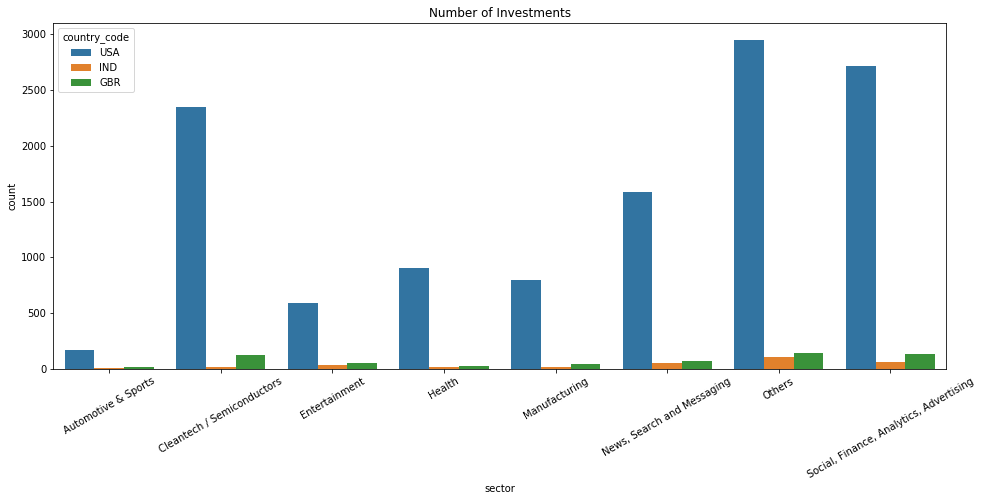

In [97]:
# plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 2)
q = sns.countplot(x='sector', hue='country_code', data=master_frame)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments')


plt.show()